Table not found on Website 1
Table not found on Website 2
Table not found on Website 3


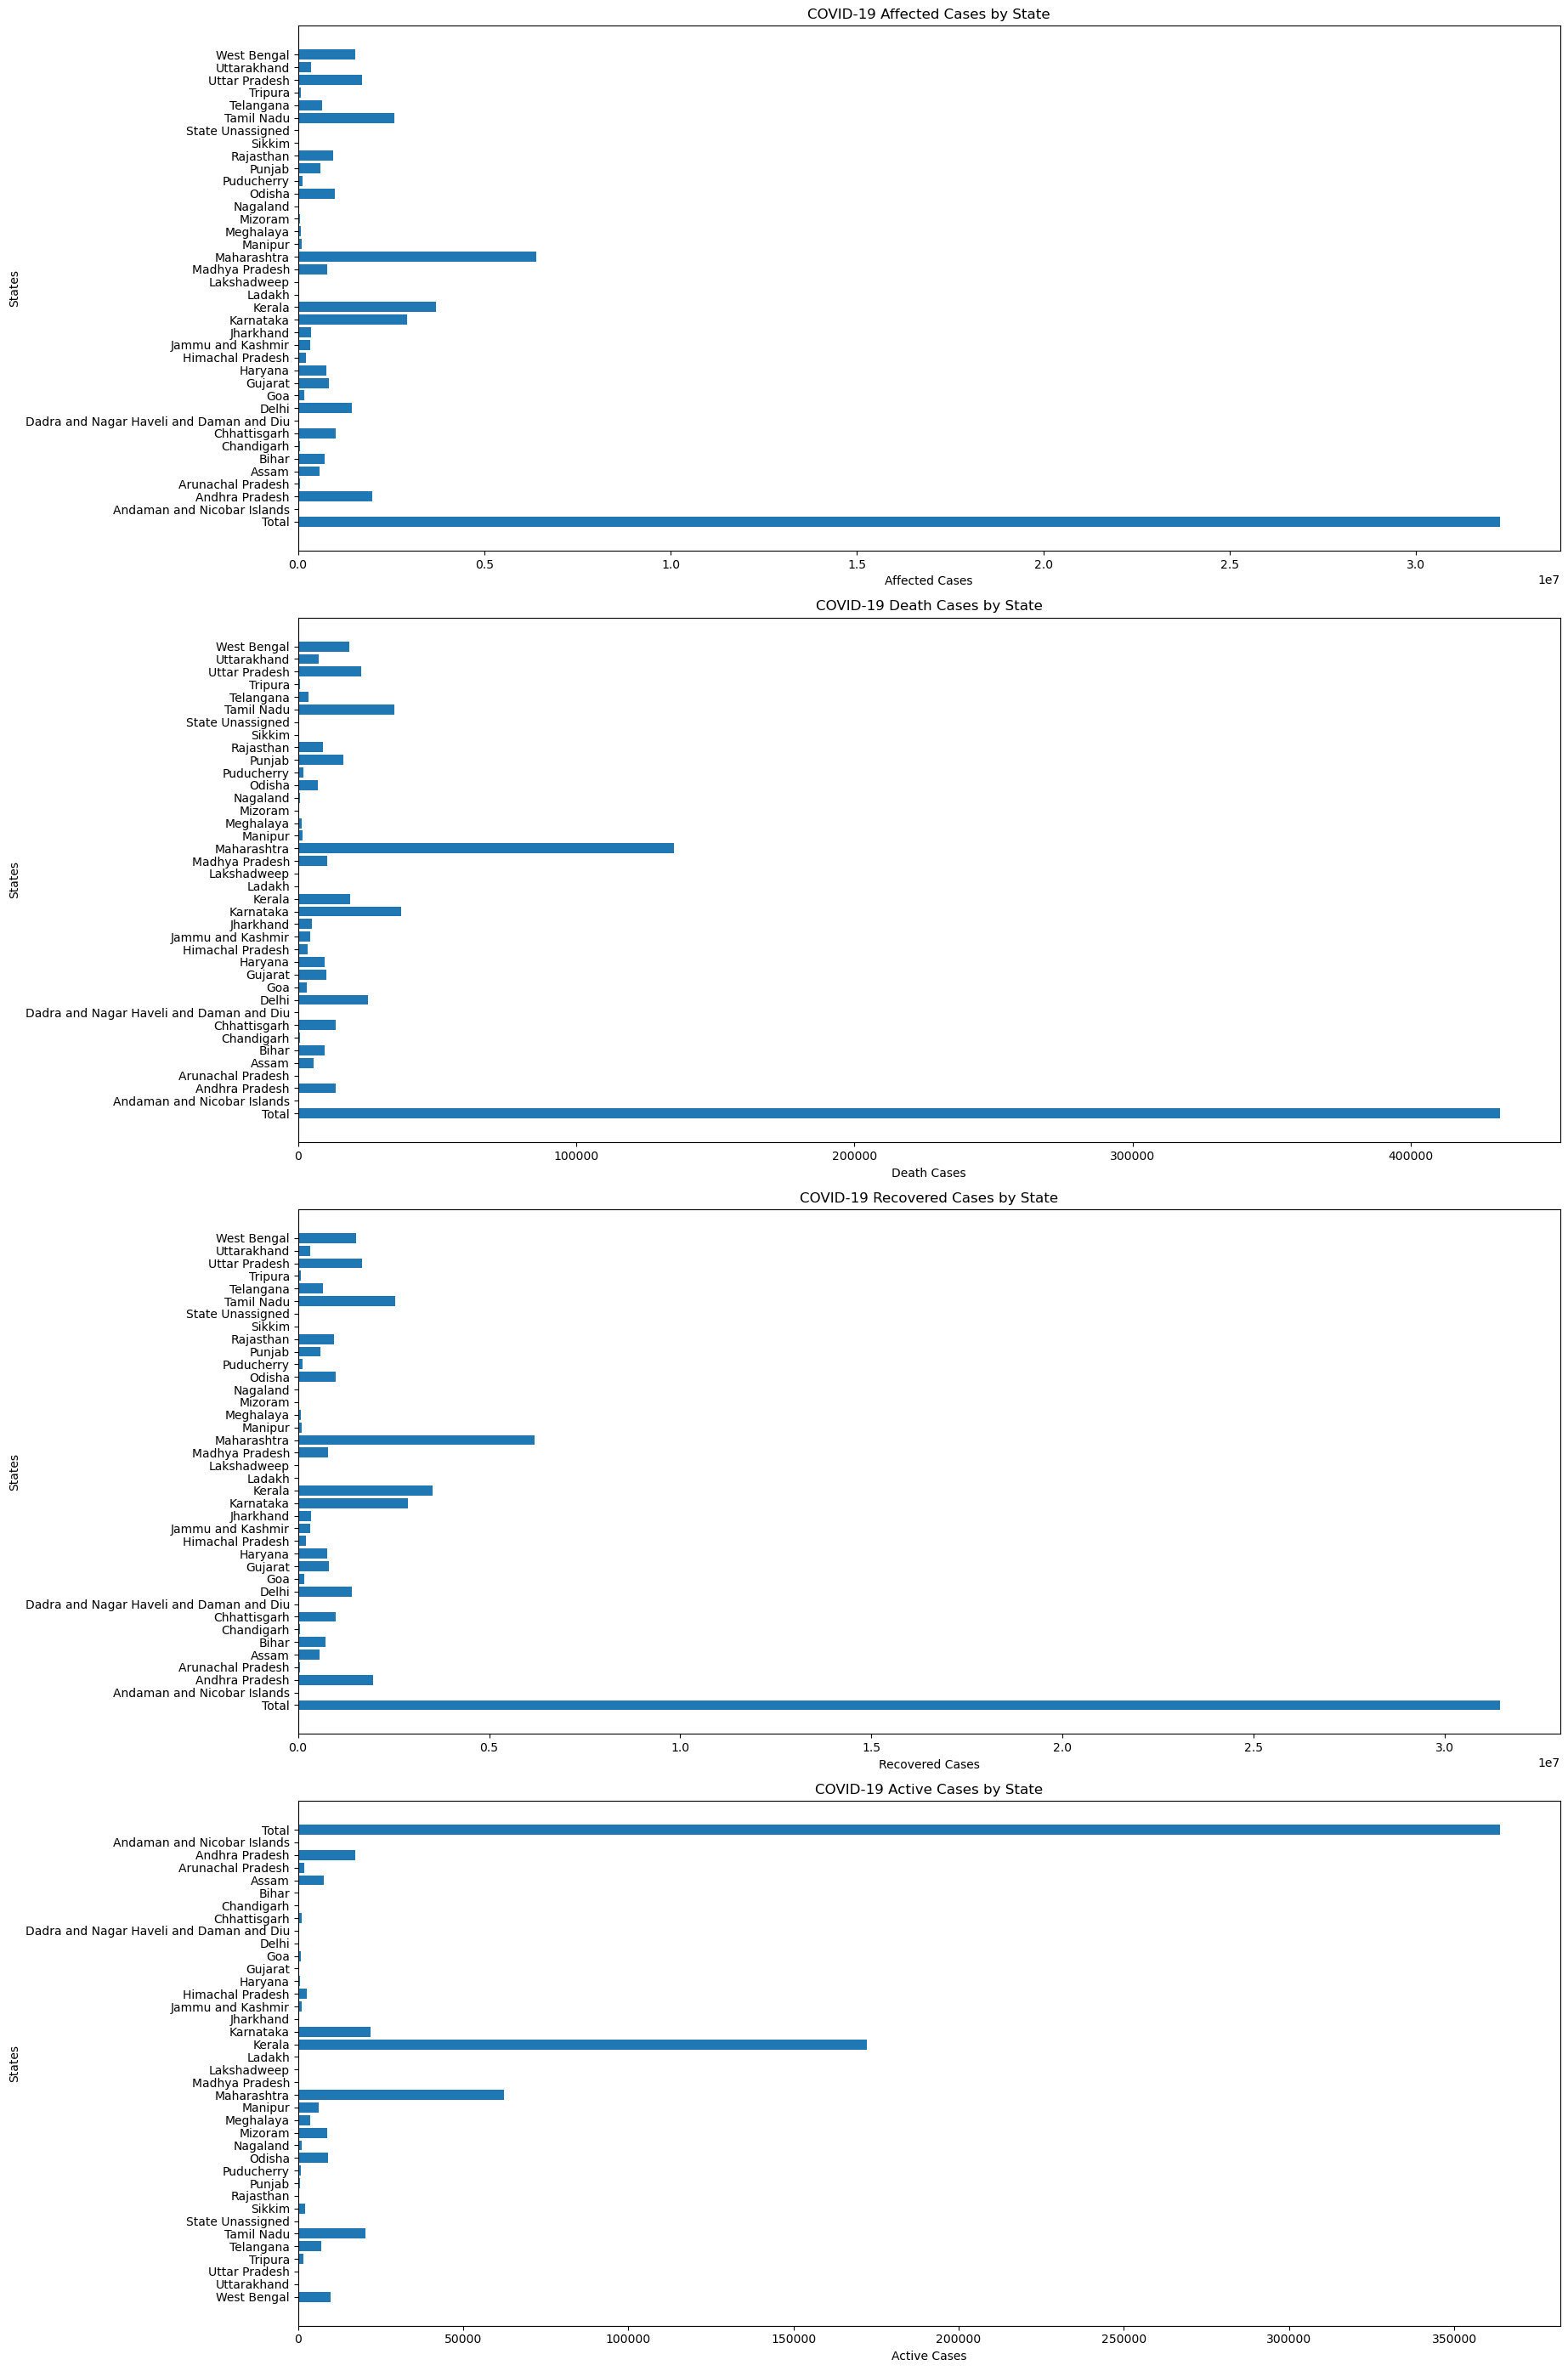

In [21]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Define the URLs of the websites you want to scrape
websites = [
    {
        'name': 'Website 1',
        'url': 'https://www.example1.com/covid-data'
    },
    {
        'name': 'Website 2',
        'url': 'https://www.example2.com/covid-data'
    },
    {
        'name': 'Website 3',
        'url': 'https://www.example3.com/covid-data'
    }
]

# Initialize lists to store the scraped data
states = []
affected_cases = []
death_cases = []
recovered_cases = []
active_cases = []

# Scrape data from each website
for website in websites:
    response = requests.get(website['url'])
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the table element
    table = soup.find('table')
    
    # Handle case where table element is not found
    if table is None:
        print(f"Table not found on {website['name']}")
        continue
    
    # Extract data from the HTML elements of the website
    rows = table.find_all('tr')
    for row in rows[1:]:  # Skip the header row
        columns = row.find_all('td')
        
        # Check if the row has sufficient columns
        if len(columns) < 5:
            print(f"Insufficient data in the row on {website['name']}")
            continue
        
        state = columns[0].text.strip()
        affected = int(columns[1].text.strip())
        death = int(columns[2].text.strip())
        recovered = int(columns[3].text.strip())
        active = int(columns[4].text.strip())
        
        # Append the data to the respective lists
        states.append(state)
        affected_cases.append(affected)
        death_cases.append(death)
        recovered_cases.append(recovered)
        active_cases.append(active)

# Fetch state-wise COVID-19 data using API
api_url = "https://api.covid19india.org/data.json"
api_response = requests.get(api_url)
api_data = api_response.json()
statewise_data = api_data["statewise"]

# Initialize dictionary to store API data
api_cases = {}

# Retrieve state-wise COVID-19 data from API
for state_data in statewise_data:
    state = state_data["state"]
    confirmed = int(state_data["confirmed"])
    active = int(state_data["active"])
    recovered = int(state_data["recovered"])
    deaths = int(state_data["deaths"])

    api_cases[state] = {
        'Confirmed': confirmed,
        'Active': active,
        'Recovered': recovered,
        'Deaths': deaths
    }

# Merge the scraped data and API data
for state in api_cases:
    if state not in states:
        states.append(state)
        affected_cases.append(api_cases[state]['Confirmed'])
        death_cases.append(api_cases[state]['Deaths'])
        recovered_cases.append(api_cases[state]['Recovered'])
        active_cases.append(api_cases[state]['Active'])

# Create charts using Matplotlib
plt.figure(figsize=(20, 28))

# Chart 1: Affected cases
plt.subplot(4, 1, 1)
plt.barh(states, affected_cases)
plt.xlabel('Affected Cases')
plt.ylabel('States')
plt.title('COVID-19 Affected Cases by State')

# Chart 2: Death cases
plt.subplot(4, 1, 2)
plt.barh(states, death_cases)
plt.xlabel('Death Cases')
plt.ylabel('States')
plt.title('COVID-19 Death Cases by State')

# Chart 3: Recovered cases
plt.subplot(4, 1, 3)
plt.barh(states, recovered_cases)
plt.xlabel('Recovered Cases')
plt.ylabel('States')
plt.title('COVID-19 Recovered Cases by State')

# Chart 4: Active cases
plt.subplot(4, 1, 4)
plt.barh(states, active_cases)
plt.xlabel('Active Cases')
plt.ylabel('States')
plt.title('COVID-19 Active Cases by State')

# Adjust the spacing between subplots
plt.tight_layout()

# Add interactivity to the charts
plt.subplots_adjust(left=0.25)
plt.gca().invert_yaxis()

# Display the charts
plt.show()